# Data downloading

In [1]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv

--2023-12-08 12:53:01--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 

3.5.25.164, 52.216.153.156, 3.5.25.123, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|3.5.25.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

      ISIC_2019_Tra   0%[                    ] 426.22K   416KB/s               ^C
--2023-12-08 12:53:03--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 16.182.98.57, 52.217.228.41, 3.5.25.164, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|16.182.98.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_GroundTruth.csv’

ISIC_2019_Training_ 100%[===================>]   1.23M  1.77MB/s    in 0.7s    

2023-12-08 12:53:04 (1.77 MB/s) - ‘ISIC_201

In [6]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
!mv ISIC_2019_Training_Metadata.csv metadata.csv

--2023-12-05 12:40:50--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.59.185, 3.5.28.182, 3.5.29.207, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.59.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214351 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_Metadata.csv’

ISIC_2019_Training_ 100%[===================>]   1.16M   460KB/s    in 2.6s    

2023-12-05 12:40:53 (460 KB/s) - ‘ISIC_2019_Training_Metadata.csv’ saved [1214351/1214351]



In [7]:
!mv ISIC_2019_Training_GroundTruth.csv labels.csv

mv: cannot stat 'ISIC_2019_Training_GroundTruth.csv': No such file or directory


In [ ]:
!unzip ISIC_2019_Training_Input.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ISIC_2019_Training_Input/ISIC_0065357.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065374.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065376.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065377.jpg  
  inflating: ISIC_2019_Training_Input/ISIC_0065378.jpg  
  inflating: ISIC_20

In [ ]:
!rm ISIC_2019_Training_Input.zip

In [ ]:
!mv ISIC_2019_Training_Input/ train/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import cv2
from PIL import Image

In [36]:
!rm isic2019/images/official/ATTRIBUTION.txt
!rm isic2019/images/official/LICENSE.txt

# Metadata research

In [3]:
sdir = '../isic2019/images/official/'
flist = os.listdir(sdir)

In [4]:
labels = pd.read_csv('../isic2019/labels/official/ISIC_2019_Training_GroundTruth.csv')
labels

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]

In [5]:
metadata = pd.read_csv('../isic2019/metadata.csv')
metadata

image  age_approx anatom_site_general    lesion_id     sex
0      ISIC_0000000        55.0      anterior torso          NaN  female
1      ISIC_0000001        30.0      anterior torso          NaN  female
2      ISIC_0000002        60.0     upper extremity          NaN  female
3      ISIC_0000003        30.0     upper extremity          NaN    male
4      ISIC_0000004        80.0     posterior torso          NaN    male
...             ...         ...                 ...          ...     ...
25326  ISIC_0073247        85.0           head/neck  BCN_0003925  female
25327  ISIC_0073248        65.0      anterior torso  BCN_0001819    male
25328  ISIC_0073249        70.0     lower extremity  BCN_0001085    male
25329  ISIC_0073251        55.0         palms/soles  BCN_0002083  female
25330  ISIC_0073254        50.0     upper extremity  BCN_0001079    male

[25331 rows x 5 columns]

In [8]:
labels.sum()

image    ISIC_0000000ISIC_0000001ISIC_0000002ISIC_00000...
MEL                                                 4522.0
NV                                                 12875.0
BCC                                                 3323.0
AK                                                   867.0
BKL                                                 2624.0
DF                                                   239.0
VASC                                                 253.0
SCC                                                  628.0
UNK                                                    0.0
dtype: object

In [7]:
labels.sum()[1:].sum() # нет пересечений между классами(мало ли)

25331.0

In [30]:
metadata.anatom_site_general.isnull().sum()

2631

In [31]:
for column in labels.columns:
    print(f'{column}: {labels[column].isnull().sum()}')

image: 0
MEL: 0
NV: 0
BCC: 0
AK: 0
BKL: 0
DF: 0
VASC: 0
SCC: 0
UNK: 0


In [32]:
for column in metadata.columns:
    print(f'{column}: {metadata[column].isnull().sum()}')

image: 0
age_approx: 437
anatom_site_general: 2631
lesion_id: 2084
sex: 384


## Research images resolution

In [18]:
width = [0 for _ in range(len(flist))]
height = [0 for _ in range(len(flist))]
for i, img in enumerate(flist):
    img = Image.open(sdir+img)
    if img.size[0] == 0:
        print(sdir+img)
    width[i] = img.size[0]
    height[i] = img.size[1]

In [19]:
width = pd.Series(width)
height = pd.Series(height)

In [20]:
print('Min and max width: ', min(width), max(width))
print('Min and max height: ', min(height), max(height))

Min and max width:  576 1024
Min and max height:  450 1024


In [28]:
width.unique(), width.describe()

(array([1024,  600,  961,  919,  767,  771, 1019,  679,  959,  964,  966,
         962,  857,  722,  963,  824,  718, 1017, 1011, 1022,  576, 1007,
        1008, 1016,  965,  960,  796,  949,  957,  838,  853,  725,  724,
         833,  958,  639]),
 count    25331.000000
 mean       854.896648
 std        206.942272
 min        576.000000
 25%        600.000000
 50%       1024.000000
 75%       1024.000000
 max       1024.000000
 dtype: float64)

In [29]:
height.unique(), height.describe()

(array([1024,  450,  768,  685,  682,  649,  680,  679,  677,  678,  684,
         676,  681,  802,  764,  576,  750,  683,  717,  715,  566,  638,
         699,  720,  751,  645,  686,  674,  543,  861,  673,  629,  719,
         687,  542,  716,  713,  767,  689,  704,  722,  634,  995,  946,
         782,  711,  671,  858,  669,  545,  878,  961,  724,  723,  626,
         798,  930,  690,  640,  688,  639,  675,  830,  614,  641,  710,
         706,  769,  672,  692,  818,  624,  642,  540,  670,  914,  602]),
 count    25331.000000
 mean       760.816075
 std        269.722902
 min        450.000000
 25%        450.000000
 50%        768.000000
 75%       1024.000000
 max       1024.000000
 dtype: float64)

In [23]:
max_dist = -1
for i in range(len(width)):
    max_dist = max(max_dist, abs(width[i] - height[i]))

max_dist

2632

In [24]:
max_resolution = -1
for i in range(len(width)):
    max_resolution = max(max_resolution, width[i] + height[i])

max_resolution

10000

In [25]:
len(height[(height == 1024) & (width == 1024)])

0

In [26]:
len(metadata[metadata.age_approx < 18])

684

In [27]:
min_resolution = (1e4, 1e4)
for i in range(len(width)):
    if width[i] * height[i] < min_resolution[0] * min_resolution[1]:
        min_resolution = (width[i], height[i])
min_resolution

(640, 480)

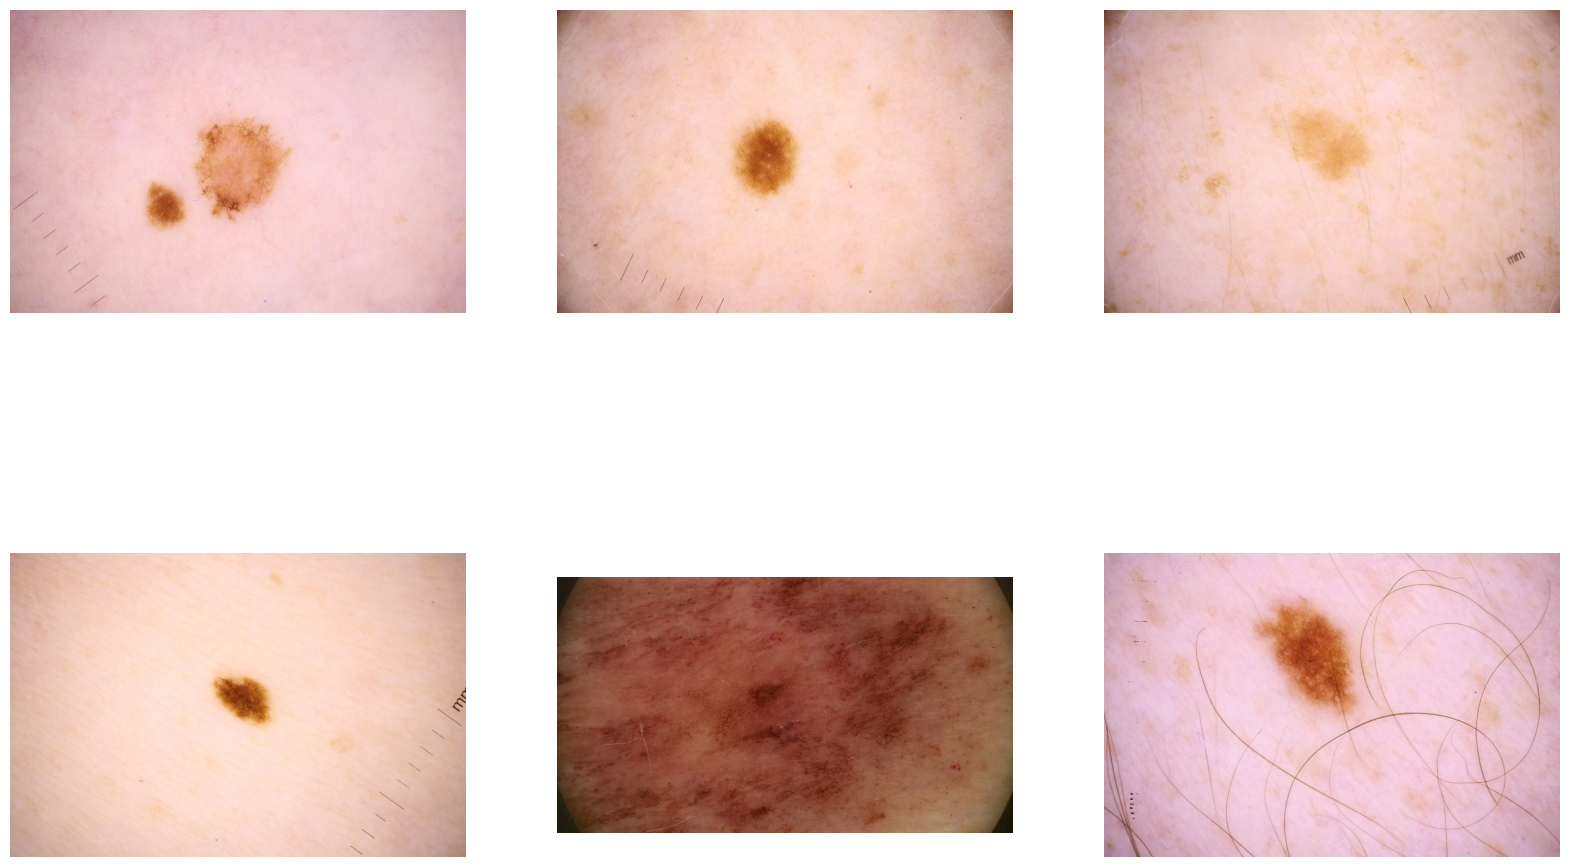

In [28]:
nrows = 4
ncols = 4

plt.figure(figsize=(20,20))

for i in range(6):
    test_img = random.choice(flist)
    test_img = os.path.join(sdir, test_img)
    plt.subplot(331 + i)
    img = cv2.imread(test_img)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.axis('off')

# Plots

<Axes: xlabel='age_approx', ylabel='Count'>

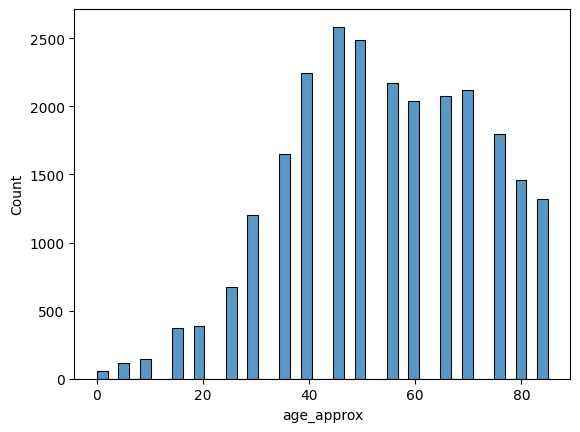

In [ ]:
sns.histplot(metadata.age_approx)

<Axes: xlabel='sex', ylabel='Count'>

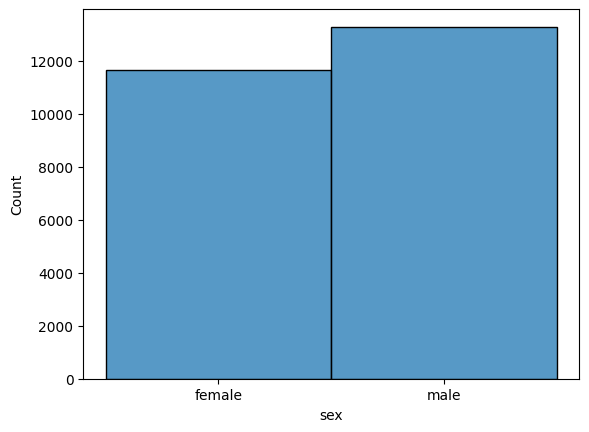

In [ ]:
sns.histplot(metadata.sex)

<Axes: xlabel='anatom_site_general', ylabel='Count'>

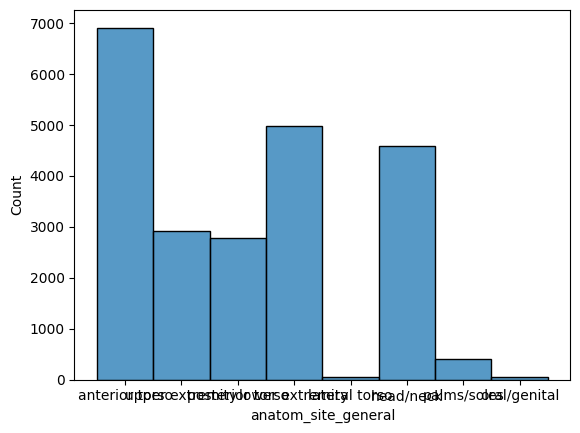

In [ ]:
sns.histplot(metadata.anatom_site_general)

<Axes: ylabel='Count'>

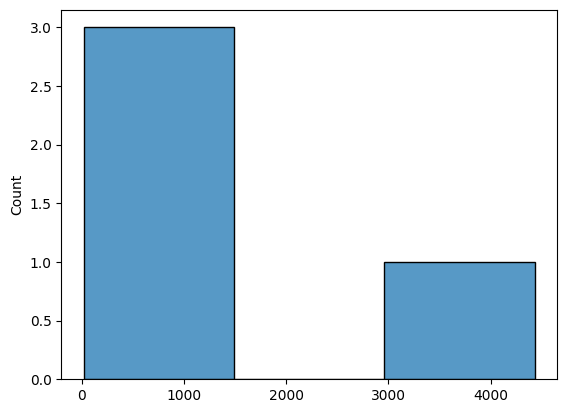

In [ ]:
sns.histplot([])

<Axes: ylabel='Count'>

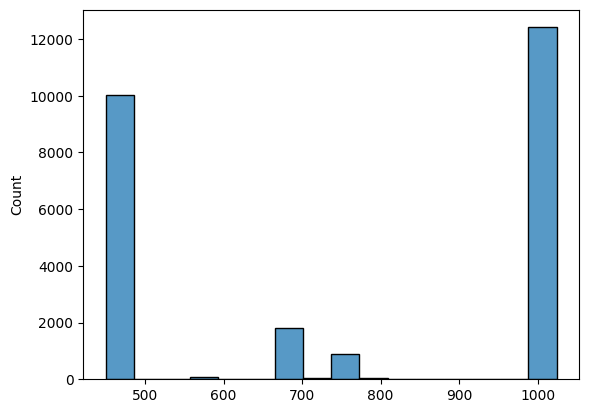

In [ ]:
sns.histplot(height)

<Axes: ylabel='Count'>

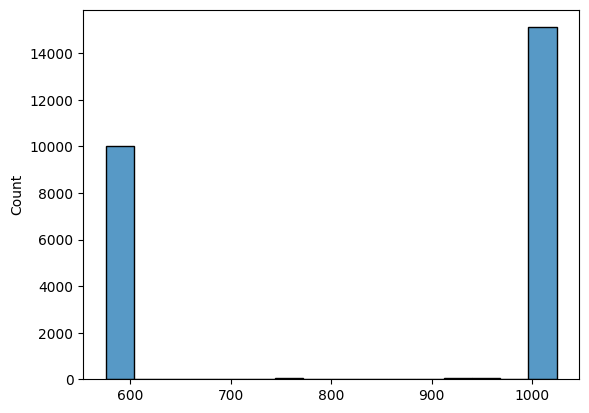

In [ ]:
sns.histplot(width)

# Cleanvision

In [9]:
labels

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0      ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1      ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2      ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3      ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4      ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
...             ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
25326  ISIC_0073247  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25327  ISIC_0073248  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25328  ISIC_0073249  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25329  ISIC_0073251  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25330  ISIC_0073254  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0

[25331 rows x 10 columns]

In [6]:
target = np.array([0 for i in range(len(labels))])

i = 0
for col in labels.columns[1:]:
    target[labels[col] == 1] = i
    i += 1


In [7]:
img_names = labels.image.values
img_names

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', ...,
       'ISIC_0073249', 'ISIC_0073251', 'ISIC_0073254'], dtype=object)

In [8]:
path_dict = {img_name:'../isic2019/images/official/' for img_name in img_names}
path_dict

{'ISIC_0000000': '../isic2019/images/official/',
 'ISIC_0000001': '../isic2019/images/official/',
 'ISIC_0000002': '../isic2019/images/official/',
 'ISIC_0000003': '../isic2019/images/official/',
 'ISIC_0000004': '../isic2019/images/official/',
 'ISIC_0000006': '../isic2019/images/official/',
 'ISIC_0000007': '../isic2019/images/official/',
 'ISIC_0000008': '../isic2019/images/official/',
 'ISIC_0000009': '../isic2019/images/official/',
 'ISIC_0000010': '../isic2019/images/official/',
 'ISIC_0000011': '../isic2019/images/official/',
 'ISIC_0000012': '../isic2019/images/official/',
 'ISIC_0000013': '../isic2019/images/official/',
 'ISIC_0000014': '../isic2019/images/official/',
 'ISIC_0000015': '../isic2019/images/official/',
 'ISIC_0000016': '../isic2019/images/official/',
 'ISIC_0000017_downsampled': '../isic2019/images/official/',
 'ISIC_0000018_downsampled': '../isic2019/images/official/',
 'ISIC_0000019_downsampled': '../isic2019/images/official/',
 'ISIC_0000020_downsampled': '../

In [9]:
from cleanvision.dataset.base_dataset import Dataset
from cleanvision.dataset.torch_dataset import TorchDataset
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, path_dict):
        self.path_dict = path_dict
        self.df = df

    def __getitem__(self, index):
        img_name = self.df['image'].values[index]
        img_path = self.path_dict[img_name] + img_name + ".jpg"
        img = Image.open(img_path).copy()

        return img,target[index]

    def __len__(self):
        return self.df.shape[0]

dataset = CustomDataset(labels, path_dict)


In [10]:
dataset[2]

(<PIL.Image.Image image mode=RGB size=1022x767>, 0)

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/25331 [00:00<?, ?it/s]

  0%|          | 0/25331 [00:00<?, ?it/s]

Issue checks completed. 791 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |          584 |
|  1 | near_duplicates  |          105 |
|  2 | exact_duplicates |          100 |
|  3 | dark             |            2 |
|  4 | grayscale        |            0 |
|  5 | light            |            0 |
|  6 | low_information  |            0 |
|  7 | odd_aspect_ratio |            0 |
|  8 | odd_size         |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 584
Examples representing most severe instances of this issue:



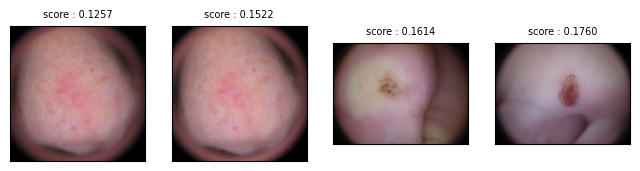

------------------ near_duplicates images ------------------

Number of examples with this issue: 105
Examples representing most severe instances of this issue:

Set: 0


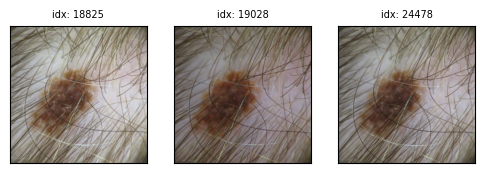

Set: 1


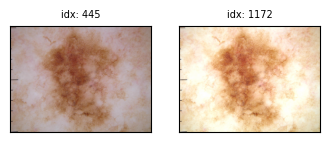

Set: 2


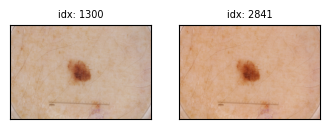

Set: 3


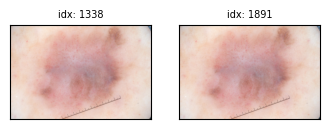

----------------- exact_duplicates images ------------------

Number of examples with this issue: 100
Examples representing most severe instances of this issue:

Set: 0


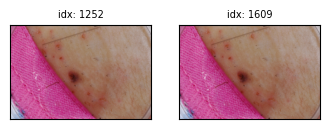

Set: 1


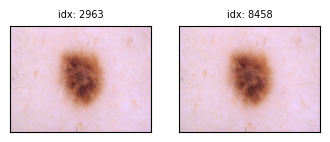

Set: 2


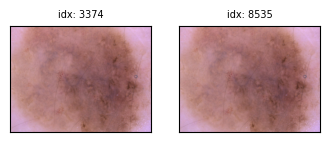

Set: 3


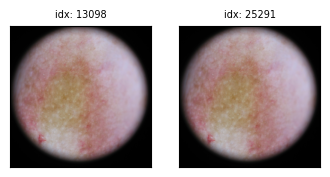

----------------------- dark images ------------------------

Number of examples with this issue: 2
Examples representing most severe instances of this issue:



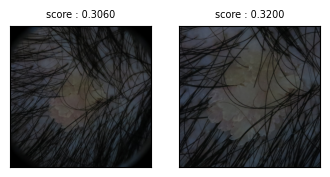

In [14]:
from cleanvision import Imagelab


imagelab = Imagelab(torchvision_dataset=dataset)

imagelab.find_issues()

imagelab.report()

In [17]:
imagelab.issues

odd_size_score  is_odd_size_issue  odd_aspect_ratio_score  \
0            0.998372              False                0.750489   
1            0.998372              False                0.750489   
2            0.998372              False                0.750489   
3            0.998372              False                0.750489   
4            0.998372              False                0.750489   
...               ...                ...                     ...   
25326        0.866025              False                1.000000   
25327        0.866025              False                1.000000   
25328        0.866025              False                1.000000   
25329        0.866025              False                1.000000   
25330        0.866025              False                1.000000   

       is_odd_aspect_ratio_issue  low_information_score  \
0                          False               0.839741   
1                          False               0.695747   
2                          False               0.843054   
3                          False               0.811329   
4                          False               0.735952   
...                          ...                    ...   
25326                      False               0.789950   
25327                      False               0.670489   
25328                      False               0.893671   
25329                      False               0.810502   
25330                      False               0.860636   

       is_low_information_issue  light_score  is_light_issue  grayscale_score  \
0                         False     0.840544           False                1   
1                         False     0.698366           False                1   
2                         False     0.714519           False                1   
3                         False     0.740138           False                1   
4                         False     0.996078           False                1   
...                         ...          ...             ...              ...   
25326                     False     0.996078           False                1   
25327                     False     0.527401           False                1   
25328                     False     0.789973           False                1   
25329                     False     0.787639           False                1   
25330                     False     0.634291           False                1   

       is_grayscale_issue  dark_score  is_dark_issue  blurry_score  \
0                   False    0.864893          False      0.415308   
1                   False    0.716847          False      0.681465   
2                   False    0.780200          False      0.328465   
3                   False    0.900491          False      0.657485   
4                   False    0.931215          False      0.684219   
...                   ...         ...            ...           ...   
25326               False    0.786945          False      0.583278   
25327               False    0.585812          False      0.671594   
25328               False    0.907075          False      0.393751   
25329               False    0.587325          False      0.520410   
25330               False    0.871786          False      0.370934   

       is_blurry_issue  exact_duplicates_score  is_exact_duplicates_issue  \
0                False                     1.0                      False   
1                False                     1.0                      False   
2                False                     1.0                      False   
3                False                     1.0                      False   
4                False                     1.0                      False   
...                ...                     ...                        ...   
25326            False                     1.0                      False   
25327            False                     1.0     

In [16]:
imagelab.issues.to_csv('ISIC2019_issues.csv')

In [11]:
results = pd.read_csv('cleanvision_results/ISIC2019_issues.csv')

In [12]:
results

Unnamed: 0  odd_size_score  is_odd_size_issue  odd_aspect_ratio_score  \
0               0        0.998372              False                0.750489   
1               1        0.998372              False                0.750489   
2               2        0.998372              False                0.750489   
3               3        0.998372              False                0.750489   
4               4        0.998372              False                0.750489   
...           ...             ...                ...                     ...   
25326       25326        0.866025              False                1.000000   
25327       25327        0.866025              False                1.000000   
25328       25328        0.866025              False                1.000000   
25329       25329        0.866025              False                1.000000   
25330       25330        0.866025              False                1.000000   

       is_odd_aspect_ratio_issue  low_information_score  \
0                          False               0.839741   
1                          False               0.695747   
2                          False               0.843054   
3                          False               0.811329   
4                          False               0.735952   
...                          ...                    ...   
25326                      False               0.789950   
25327                      False               0.670489   
25328                      False               0.893671   
25329                      False               0.810502   
25330                      False               0.860636   

       is_low_information_issue  light_score  is_light_issue  grayscale_score  \
0                         False     0.840544           False                1   
1                         False     0.698366           False                1   
2                         False     0.714519           False                1   
3                         False     0.740138           False                1   
4                         False     0.996078           False                1   
...                         ...          ...             ...              ...   
25326                     False     0.996078           False                1   
25327                     False     0.527401           False                1   
25328                     False     0.789973           False                1   
25329                     False     0.787639           False                1   
25330                     False     0.634291           False                1   

       is_grayscale_issue  dark_score  is_dark_issue  blurry_score  \
0                   False    0.864893          False      0.415308   
1                   False    0.716847          False      0.681465   
2                   False    0.780200          False      0.328465   
3                   False    0.900491          False      0.657485   
4                   False    0.931215          False      0.684219   
...                   ...         ...            ...           ...   
25326               False    0.786945          False      0.583278   
25327               False    0.585812          False      0.671594   
25328               False    0.907075          False      0.393751   
25329               False    0.587325          False      0.520410   
25330               False    0.871786          False      0.370934   

       is_blurry_issue  exact_duplicates_score  is_exact_duplicates_issue  \
0                False                     1.0                      False   
1                False                     1.0                      False   
2                False                     1.0                      False   
3                False                     1.0                      False   
4                False                     1.0                      False   
...                ...                     ...               

In [13]:
check_cols = ['is_odd_size_issue', 'is_odd_aspect_ratio_issue', 'is_low_information_issue', 'is_light_issue', 
              'is_grayscale_issue', 'is_dark_issue', 'is_blurry_issue', 'is_exact_duplicates_issue', 'is_near_duplicates_issue']

In [14]:
for col in check_cols:
    print(col, ': ', results[col].sum())

is_odd_size_issue :  0
is_odd_aspect_ratio_issue :  0
is_low_information_issue :  0
is_light_issue :  0
is_grayscale_issue :  0
is_dark_issue :  2
is_blurry_issue :  584
is_exact_duplicates_issue :  100
is_near_duplicates_issue :  105


In [20]:
condition = results['is_odd_size_issue'] | results['is_odd_aspect_ratio_issue'] | results['is_low_information_issue'] | results['is_light_issue'] | \
 results['is_grayscale_issue'] | results['is_dark_issue'] | results['is_blurry_issue'] | results['is_exact_duplicates_issue'] | results['is_near_duplicates_issue']

issues = results[condition]
issues

Unnamed: 0  odd_size_score  is_odd_size_issue  odd_aspect_ratio_score  \
10             10        0.998372              False                0.750489   
43             43        1.000000              False                0.750000   
46             46        1.000000              False                0.750000   
69             69        0.998372              False                0.750489   
73             73        1.000000              False                0.750000   
...           ...             ...                ...                     ...   
25229       25229        0.866025              False                1.000000   
25261       25261        0.866025              False                1.000000   
25279       25279        0.866025              False                1.000000   
25281       25281        0.866025              False                1.000000   
25291       25291        0.866025              False                1.000000   

       is_odd_aspect_ratio_issue  low_information_score  \
10                         False               0.848302   
43                         False               0.869004   
46                         False               0.852883   
69                         False               0.857449   
73                         False               0.833439   
...                          ...                    ...   
25229                      False               0.745569   
25261                      False               0.813395   
25279                      False               0.844031   
25281                      False               0.866202   
25291                      False               0.832367   

       is_low_information_issue  light_score  is_light_issue  grayscale_score  \
10                        False     0.964706           False                1   
43                        False     0.992157           False                1   
46                        False     0.880181           False                1   
69                        False     0.976471           False                1   
73                        False     0.984314           False                1   
...                         ...          ...             ...              ...   
25229                     False     0.650281           False                1   
25261                     False     0.878079           False                1   
25279                     False     0.996078           False                1   
25281                     False     0.984314           False                1   
25291                     False     0.996078           False                1   

       is_grayscale_issue  dark_score  is_dark_issue  blurry_score  \
10                  False    0.743352          False      0.268153   
43                  False    0.834657          False      0.252387   
46                  False    0.749042          False      0.268365   
69                  False    0.743962          False      0.264163   
73                  False    0.703516          False      0.232650   
...                   ...         ...            ...           ...   
25229               False    0.568432          False      0.549455   
25261               False    0.714709          False      0.549857   
25279               False    0.814360          False      0.482458   
25281               False    0.862019          False      0.286785   
25291               False    0.747118          False      0.502835   

       is_blurry_issue  exact_duplicates_score  is_exact_duplicates_issue  \
10                True                     1.0                      False   
43                True                     1.0                      False   
46                True                     1.0                      False   
69                True                     1.0                      False   
73                True                     1.0                      False   
...                ...                     ...               

In [21]:
duplicates = imagelab.info['exact_duplicates']['sets']
duplicates = pd.DataFrame(duplicates, columns=['first', 'second'])
duplicates.head(10)

NameError: name 'imagelab' is not defined

In [22]:
near_duplicates = imagelab.info['near_duplicates']['sets']
near_duplicates = pd.DataFrame(near_duplicates, columns=['first', 'second', 'third'])
near_duplicates.head(10)

NameError: name 'imagelab' is not defined

In [95]:
results[(results['is_exact_duplicates_issue'] == True) & (results['is_near_duplicates_issue'] == True)]

Empty DataFrame
Columns: [Unnamed: 0, odd_size_score, is_odd_size_issue, odd_aspect_ratio_score, is_odd_aspect_ratio_issue, low_information_score, is_low_information_issue, light_score, is_light_issue, grayscale_score, is_grayscale_issue, dark_score, is_dark_issue, blurry_score, is_blurry_issue, exact_duplicates_score, is_exact_duplicates_issue, near_duplicates_score, is_near_duplicates_issue]
Index: []

In [30]:
duplicates.to_csv('cleanvision_results/duplicates2019.csv', index=False)
near_duplicates.to_csv('cleanvision_results/near_duplicates2019.csv', index=False)

In [15]:
duplicates = pd.read_csv('cleanvision_results/duplicates2019.csv')
near_duplicates = pd.read_csv('cleanvision_results/near_duplicates2019.csv')

In [33]:
near_duplicates

first  second    third
0     445    1172      NaN
1    1300    2841      NaN
2    1338    1891      NaN
3    1574    1617      NaN
4    2826    2827      NaN
5    2930    3227      NaN
6    2991    8113      NaN
7    3255    4869      NaN
8    3350    6116      NaN
9    3467    3983      NaN
10   3505    8676      NaN
11   3525    6484      NaN
12   3535    3828      NaN
13   3596    4109      NaN
14   5084   10581      NaN
15   5805    8101      NaN
16   5995   11004      NaN
17   6193   10138      NaN
18   6586    8145      NaN
19   7334    8654      NaN
20   9041    9570      NaN
21  10825   12195      NaN
22  12936   17045      NaN
23  12940   20032      NaN
24  13418   22498      NaN
25  13663   22630      NaN
26  13671   16434      NaN
27  14470   17981      NaN
28  14530   21574      NaN
29  15011   21374      NaN
30  15629   20955      NaN
31  16297   21081      NaN
32  16489   23043      NaN
33  17216   20563      NaN
34  17385   22547      NaN
35  17400   22694      NaN
36  17878   21402      NaN
37  17941   24670      NaN
38  18649   19120      NaN
39  18825   19028  24478.0
40  19327   21929      NaN
41  19362   22805      NaN
42  19747   20401      NaN
43  19791   22938      NaN
44  20077   23021      NaN
45  20111   25077      NaN
46  20120   22994      NaN
47  20826   25261      NaN
48  21341   23387      NaN
49  22257   22335      NaN
50  22678   23734      NaN
51  22986   24271      NaN

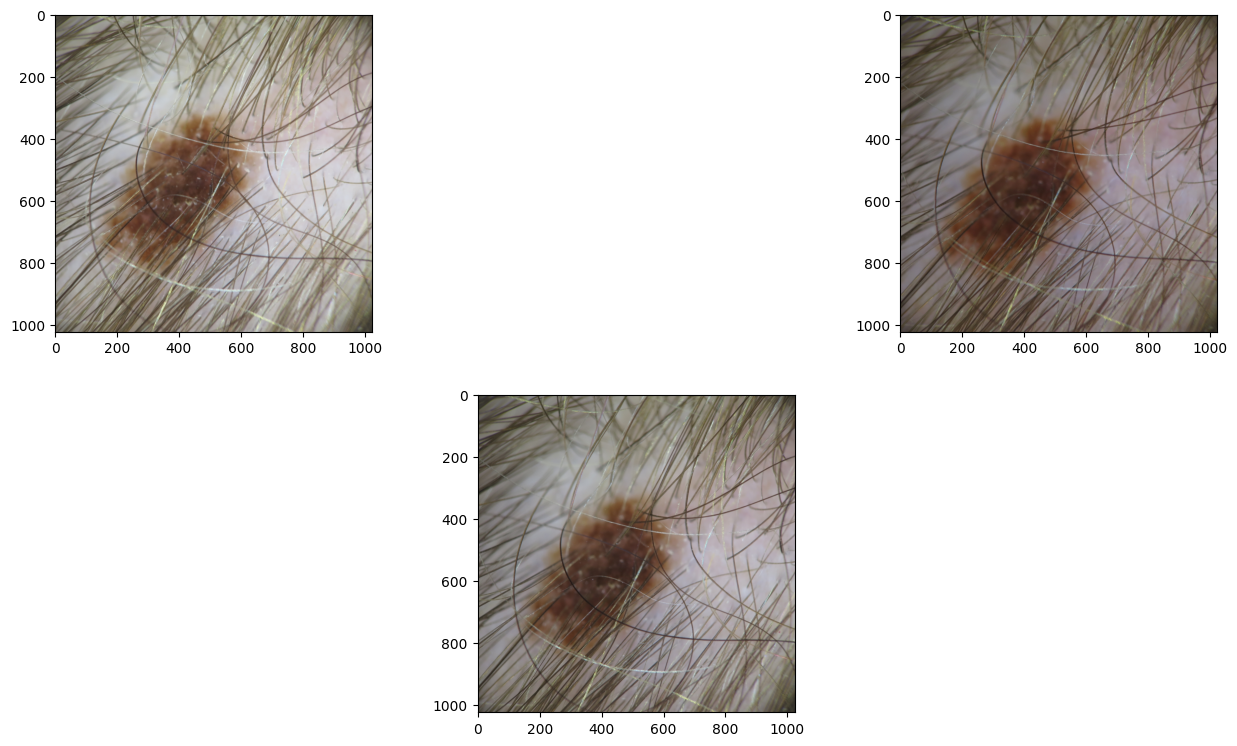

In [26]:
plt.figure(figsize=(20, 14))
plt.subplot(321)
plt.imshow(dataset[18825][0])
plt.subplot(322)
plt.imshow(dataset[19028][0])
plt.subplot(335)
plt.imshow(dataset[24478][0])

/tmp/ipykernel_56963/1168322107.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  img2 = int(duplicates[duplicates['first'] == img1]['second'])


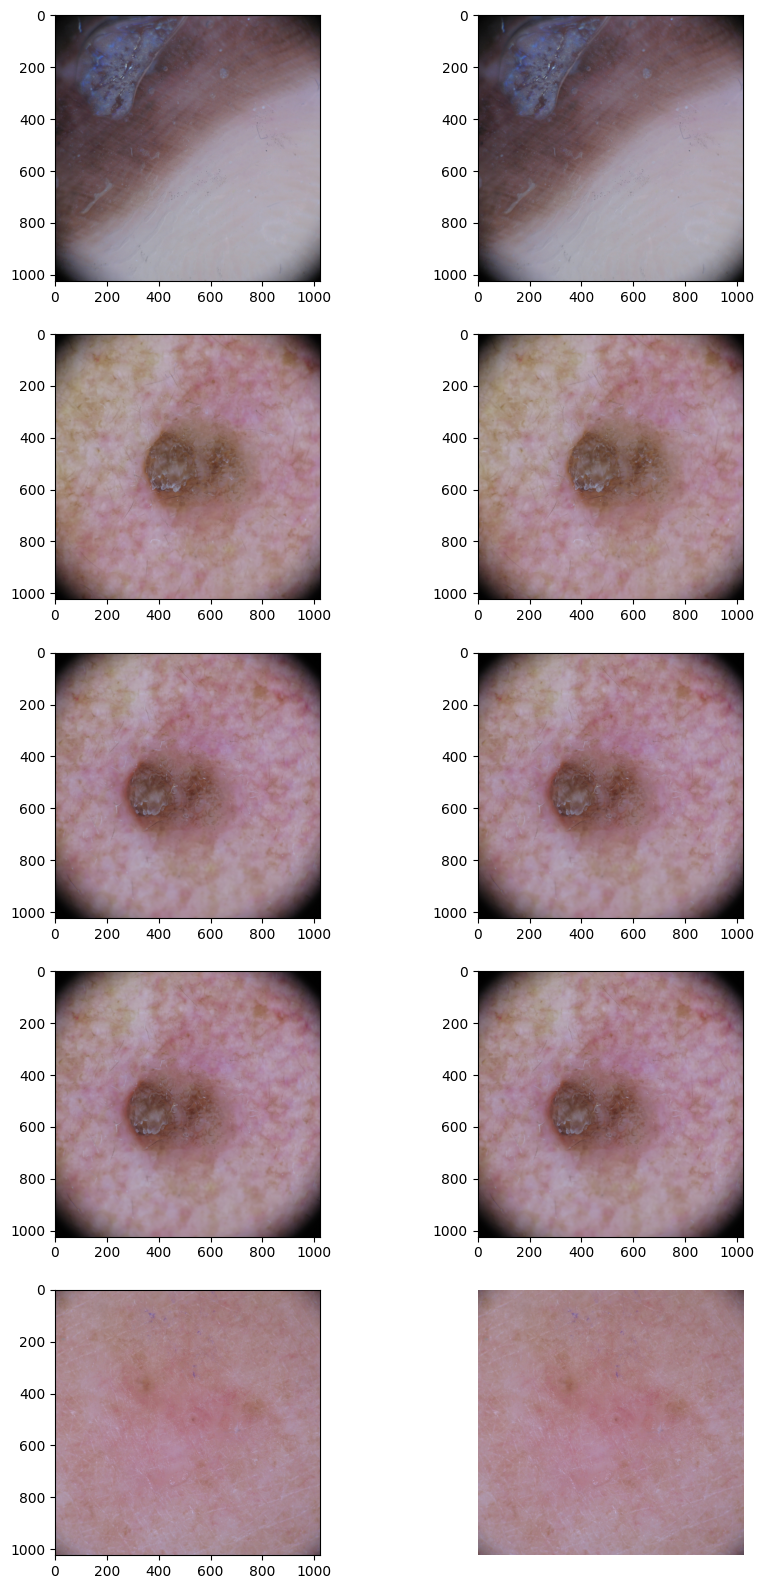

In [91]:
nrows = 4
ncols = 4

f, ax = plt.subplots(5,2)
f.set_figheight(20)
f.set_figwidth(10)

x,y = 0,0

for i in range(5):
    img1 = random.choice(duplicates['first'])
    img2 = int(duplicates[duplicates['first'] == img1]['second'])

    ax[x,y].imshow(dataset[img1][0])
    y += 1
    ax[x,y].imshow(dataset[img2][0])
    x += 1
    y = 0
    plt.axis('off')

/tmp/ipykernel_63221/1425807489.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  img2 = int(near_duplicates[near_duplicates['first'] == img1]['second'])


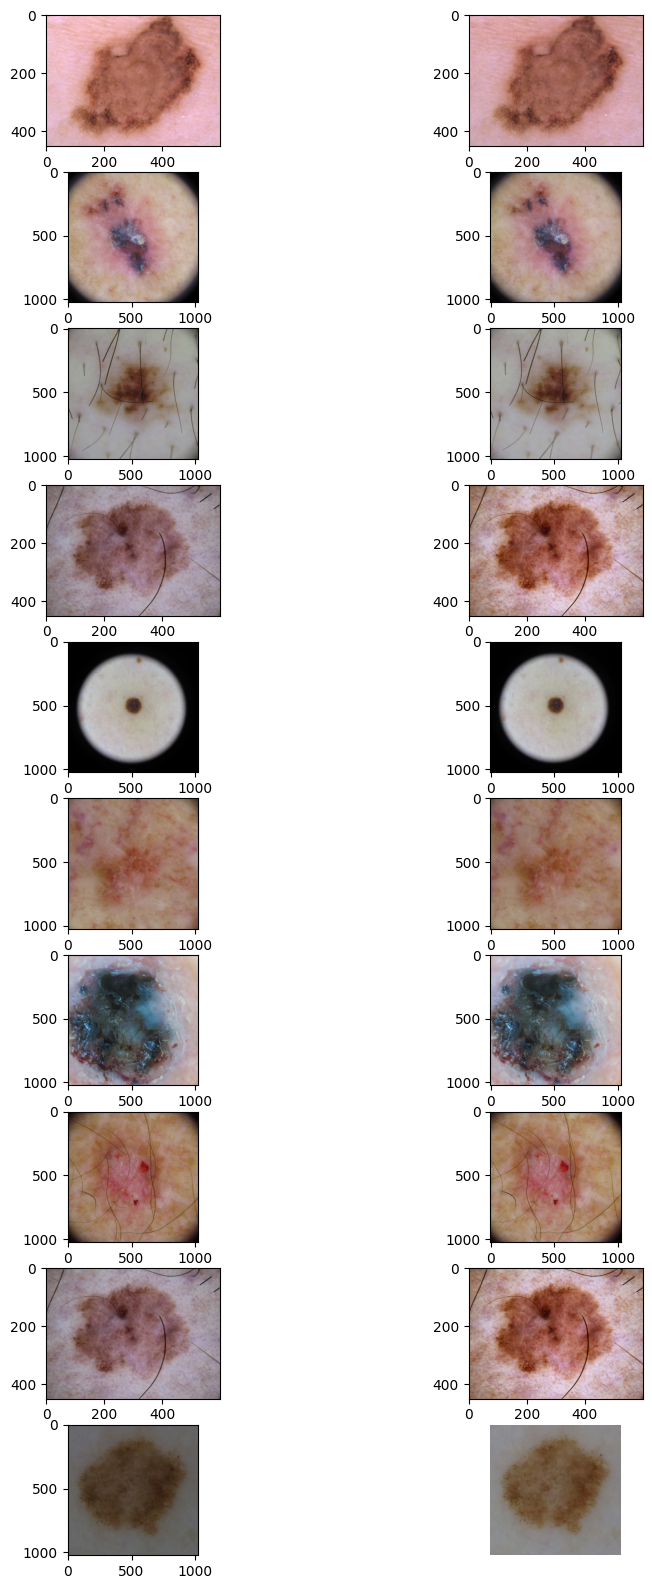

In [27]:
nrows = 4
ncols = 4

f, ax = plt.subplots(10,2)
f.set_figheight(20)
f.set_figwidth(10)

x,y = 0,0

for i in range(10):
    img1 = random.choice(near_duplicates['first'])
    img2 = int(near_duplicates[near_duplicates['first'] == img1]['second'])

    ax[x,y].imshow(dataset[img1][0])
    y += 1
    ax[x,y].imshow(dataset[img2][0])
    x += 1
    y = 0
    plt.axis('off')

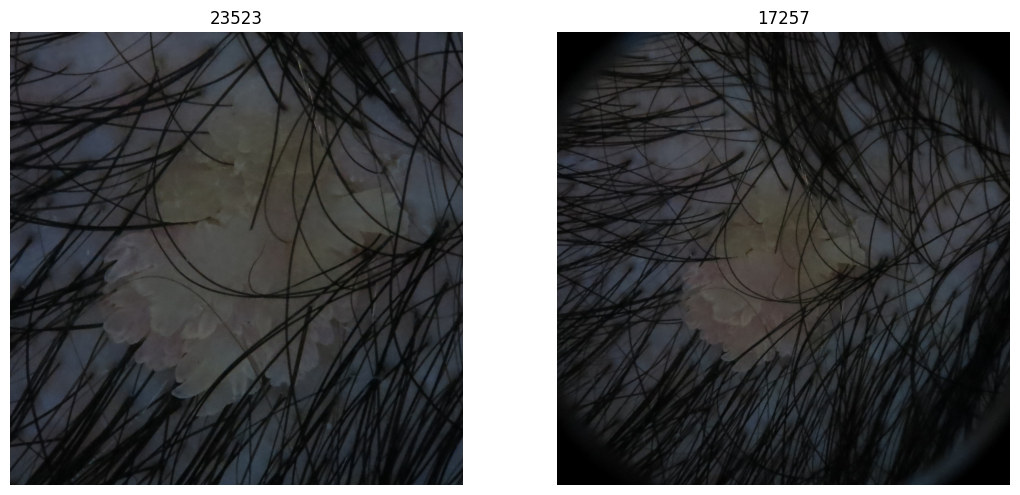

In [84]:
nrows = 5
ncols = 5

plt.figure(figsize=(20,20))

for i in range(2):
    img = random.choice(results[results['is_dark_issue'] == True].index)
    plt.subplot(331 + i)
    plt.title(img)
    plt.imshow(dataset[img][0])
    plt.axis('off')

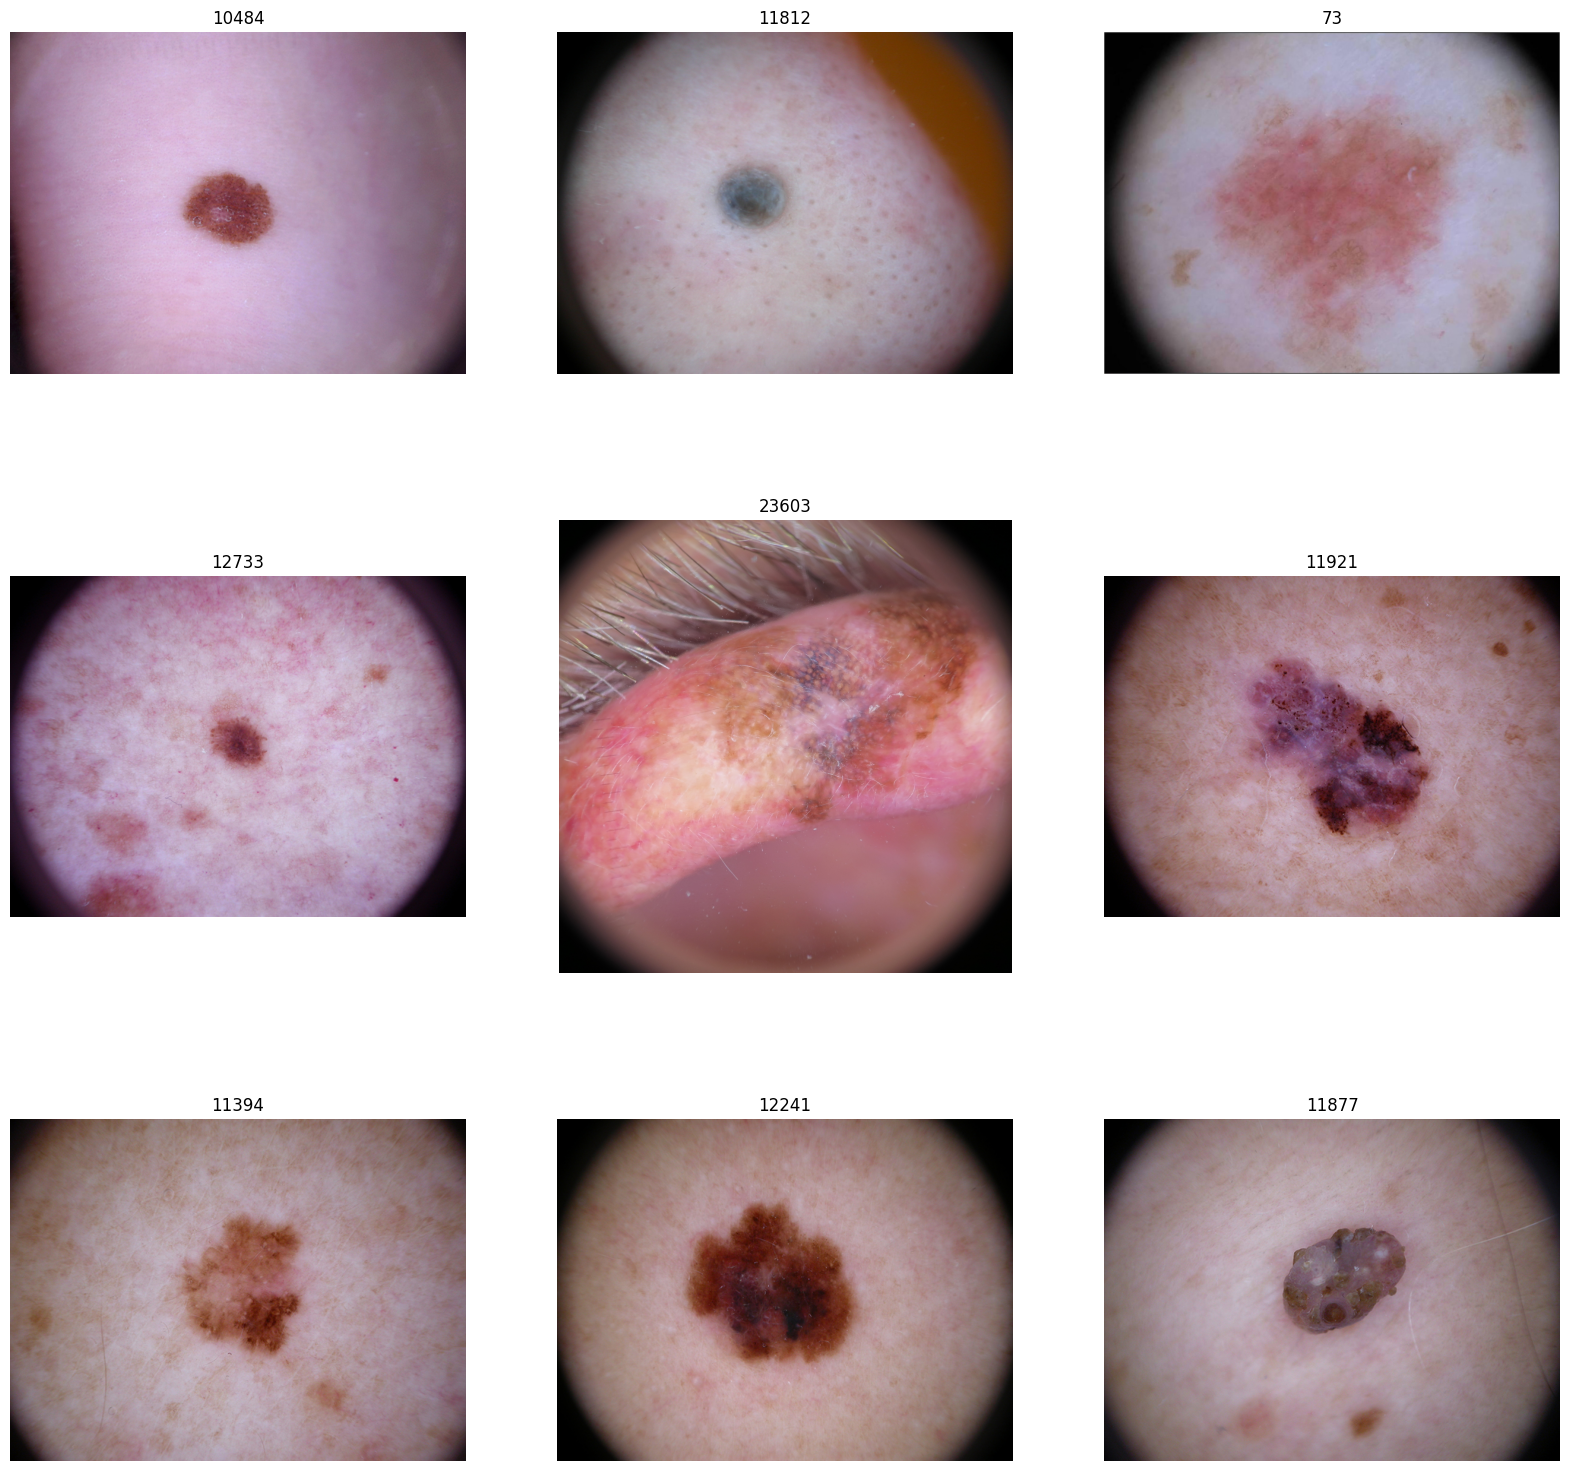

In [86]:
nrows = 5
ncols = 5

plt.figure(figsize=(20,20))

for i in range(9):
    img = random.choice(results[results['is_blurry_issue'] == True].index)
    plt.subplot(331 + i)
    plt.title(img)
    plt.imshow(dataset[img][0])
    plt.axis('off')

In [82]:
results[results['is_dark_issue'] == True]

Unnamed: 0  odd_size_score  is_odd_size_issue  odd_aspect_ratio_score  \
17257       17257        0.866025              False                     1.0   
23523       23523        0.866025              False                     1.0   

       is_odd_aspect_ratio_issue  low_information_score  \
17257                      False               0.787146   
23523                      False               0.784858   

       is_low_information_issue  light_score  is_light_issue  grayscale_score  \
17257                     False     0.978367           False                1   
23523                     False     0.957184           False                1   

       is_grayscale_issue  dark_score  is_dark_issue  blurry_score  \
17257               False    0.306037           True      0.511614   
23523               False    0.319964           True      0.520965   

       is_blurry_issue  exact_duplicates_score  is_exact_duplicates_issue  \
17257            False                     1.0                      False   
23523            False                     1.0                      False   

       near_duplicates_score  is_near_duplicates_issue  
17257                    1.0                     False  
23523                    1.0                     False

In [39]:
results[results['is_dark_issue'] == True].index

Index([17257, 23523], dtype='int64')